In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch_geometric.data import Data
from torch_geometric.utils import degree
from collections import Counter
import torch

In [2]:
df = pd.read_csv('Facebook_nodes.csv')
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,119,120,121,122,123,124,125,126,127,label
0,0,-0.262576,-0.276483,-0.262350,-0.299327,-0.299159,-0.270681,-0.307757,-0.269733,-0.25101,...,-0.273229,-0.223700,-0.284379,-0.224216,-0.209509,-0.255755,-0.215140,-0.375903,-0.223836,0
1,1,-0.262576,-0.276483,-0.262350,-0.299327,-0.299159,-0.270681,-0.307757,-0.269733,-0.25101,...,-0.234818,-0.223700,-0.284379,-0.197935,-0.147256,-0.255755,-0.215140,-0.364134,-0.128634,2
2,2,-0.262576,-0.265053,-0.262350,-0.299327,-0.299159,-0.270681,-0.307757,-0.210461,-0.25101,...,-0.273229,-0.223700,-0.284379,-0.224216,-0.209509,-0.255755,-0.215140,-0.375903,-0.223836,1
3,3,-0.246378,-0.276483,-0.241991,-0.299327,-0.299159,-0.270681,-0.307051,-0.269733,-0.25101,...,-0.273229,-0.223700,-0.265534,-0.080353,-0.209509,-0.250560,-0.180260,-0.375903,-0.223836,2
4,4,-0.262576,-0.276483,-0.262350,-0.299327,-0.299159,-0.270681,-0.307757,-0.269733,-0.25101,...,-0.273229,-0.175312,-0.272613,-0.224216,-0.181153,-0.255755,-0.215140,-0.370639,-0.223836,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22465,22465,-0.262576,-0.276483,-0.262350,-0.296955,-0.299159,-0.270681,-0.307757,-0.269733,-0.25101,...,-0.273229,-0.223700,-0.284379,-0.224216,-0.209509,-0.255755,-0.196685,-0.370115,-0.223836,3
22466,22466,-0.262576,-0.276483,-0.262350,-0.299327,-0.299159,-0.270681,-0.307757,-0.269733,-0.25101,...,-0.273229,-0.221643,-0.284379,-0.224216,-0.209509,-0.255755,-0.215140,-0.375903,-0.223836,1
22467,22467,-0.262576,-0.276483,-0.262350,-0.299327,-0.299159,-0.270681,-0.307757,-0.269733,-0.25101,...,-0.273229,-0.223700,-0.284379,-0.224216,-0.146793,-0.255755,-0.180389,-0.372097,-0.222613,2
22468,22468,-0.262576,-0.276483,-0.262350,-0.299327,-0.299159,-0.270681,-0.307668,-0.269733,-0.25101,...,-0.273229,-0.223700,-0.284379,-0.224216,-0.209509,-0.252456,-0.215140,-0.375903,-0.218148,1


In [3]:
edge_table = pd.read_csv('Facebook_edge.csv')
edge_table

,Unnamed: 0,source,target
0,0,0,18427
1,1,18427,0
2,2,1,21708
3,3,21708,1
4,4,1,22208
...,...,...,...
341999,341999,22348,22348
342000,342000,5563,5563
342001,342001,5563,5563
342002,342002,22425,22425


In [4]:
df.drop(columns=['Unnamed: 0'],inplace=True)
edge_table.drop(columns=['Unnamed: 0'],inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,label
0,-0.262576,-0.276483,-0.262350,-0.299327,-0.299159,-0.270681,-0.307757,-0.269733,-0.25101,-0.308343,...,-0.273229,-0.223700,-0.284379,-0.224216,-0.209509,-0.255755,-0.215140,-0.375903,-0.223836,0
1,-0.262576,-0.276483,-0.262350,-0.299327,-0.299159,-0.270681,-0.307757,-0.269733,-0.25101,-0.308343,...,-0.234818,-0.223700,-0.284379,-0.197935,-0.147256,-0.255755,-0.215140,-0.364134,-0.128634,2
2,-0.262576,-0.265053,-0.262350,-0.299327,-0.299159,-0.270681,-0.307757,-0.210461,-0.25101,3.222161,...,-0.273229,-0.223700,-0.284379,-0.224216,-0.209509,-0.255755,-0.215140,-0.375903,-0.223836,1
3,-0.246378,-0.276483,-0.241991,-0.299327,-0.299159,-0.270681,-0.307051,-0.269733,-0.25101,-0.308343,...,-0.273229,-0.223700,-0.265534,-0.080353,-0.209509,-0.250560,-0.180260,-0.375903,-0.223836,2
4,-0.262576,-0.276483,-0.262350,-0.299327,-0.299159,-0.270681,-0.307757,-0.269733,-0.25101,-0.308343,...,-0.273229,-0.175312,-0.272613,-0.224216,-0.181153,-0.255755,-0.215140,-0.370639,-0.223836,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22465,-0.262576,-0.276483,-0.262350,-0.296955,-0.299159,-0.270681,-0.307757,-0.269733,-0.25101,-0.308343,...,-0.273229,-0.223700,-0.284379,-0.224216,-0.209509,-0.255755,-0.196685,-0.370115,-0.223836,3
22466,-0.262576,-0.276483,-0.262350,-0.299327,-0.299159,-0.270681,-0.307757,-0.269733,-0.25101,-0.308343,...,-0.273229,-0.221643,-0.284379,-0.224216,-0.209509,-0.255755,-0.215140,-0.375903,-0.223836,1
22467,-0.262576,-0.276483,-0.262350,-0.299327,-0.299159,-0.270681,-0.307757,-0.269733,-0.25101,-0.308343,...,-0.273229,-0.223700,-0.284379,-0.224216,-0.146793,-0.255755,-0.180389,-0.372097,-0.222613,2
22468,-0.262576,-0.276483,-0.262350,-0.299327,-0.299159,-0.270681,-0.307668,-0.269733,-0.25101,-0.308343,...,-0.273229,-0.223700,-0.284379,-0.224216,-0.209509,-0.252456,-0.215140,-0.375903,-0.218148,1


In [5]:
edge_table

,source,target
0,0,18427
1,18427,0
2,1,21708
3,21708,1
4,1,22208
...,...,...
341999,22348,22348
342000,5563,5563
342001,5563,5563
342002,22425,22425


In [6]:
node_features = torch.tensor(df.iloc[:,:-1].values,dtype= torch.float32)

In [7]:
node_features.shape

torch.Size([22470, 128])

In [8]:
edge_index = torch.tensor(edge_table[['source', 'target']].values.T, dtype=torch.int64)
edge_index.shape

torch.Size([2, 342004])

In [9]:
#Extract label information
y = torch.tensor(df.iloc[:,-1].values,dtype = torch.float)
y

tensor([0., 2., 1.,  ..., 2., 1., 0.])

In [10]:
# Extract node features
node_features = torch.tensor(df.iloc[:,:-1].values,dtype= torch.float32)

# Extract edge information
edge_index = torch.tensor(edge_table[['source', 'target']].values.T, dtype=torch.int64)

#Extract label information
y = torch.tensor(df.iloc[:,-1].values,dtype = torch.float32)
# Create a Data object
data = Data(x=node_features, edge_index=edge_index,y = y)


In [11]:
data

Data(x=[22470, 128], edge_index=[2, 342004], y=[22470])

In [12]:
data.num_classes = df['label'].nunique()

In [13]:
data.num_classes

4

In [14]:
data.train_mask = range(600)
data.test_mask = range(18001,18100)
data.val_mask = range(20001,21001)

In [15]:
data.train_mask

range(0, 600)

In [16]:
data.num_features

128

In [17]:
data.num_edge_features

0

In [18]:
data.num_node_features

128

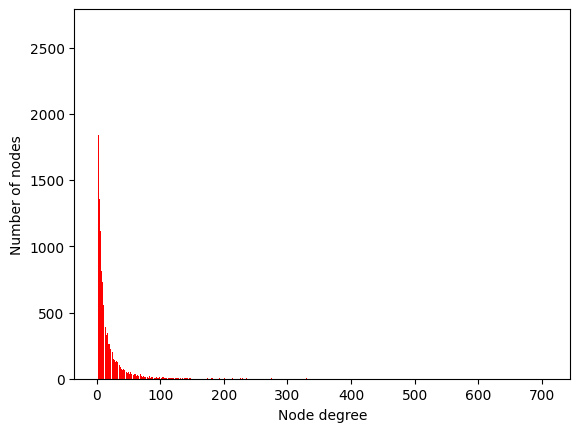

In [19]:
degrees = degree(data.edge_index[0]).numpy()
numbers = Counter(degrees)
fig, ax = plt.subplots()
ax.set_xlabel('Node degree')
ax.set_ylabel('Number of nodes')
plt.bar(numbers.keys(), numbers.values(),color = 'red')
plt.show()

In [20]:
numbers

Counter({1.0: 2658,
         2.0: 2307,
         3.0: 1843,
         4.0: 1516,
         5.0: 1359,
         6.0: 1114,
         7.0: 974,
         8.0: 811,
         9.0: 731,
         10.0: 618,
         11.0: 555,
         12.0: 494,
         13.0: 452,
         14.0: 391,
         15.0: 380,
         17.0: 348,
         16.0: 333,
         18.0: 316,
         19.0: 265,
         20.0: 264,
         21.0: 233,
         22.0: 227,
         23.0: 213,
         25.0: 200,
         24.0: 193,
         26.0: 192,
         29.0: 151,
         27.0: 149,
         28.0: 145,
         31.0: 132,
         33.0: 130,
         30.0: 127,
         32.0: 112,
         35.0: 107,
         36.0: 107,
         34.0: 102,
         37.0: 89,
         38.0: 85,
         43.0: 76,
         40.0: 74,
         42.0: 70,
         39.0: 70,
         44.0: 69,
         41.0: 67,
         45.0: 59,
         51.0: 54,
         53.0: 53,
         48.0: 52,
         47.0: 51,
         46.0: 49,
         50.0: 48

In [21]:
data.y = data.y.int()

In [23]:
from torch_geometric.nn import GATv2Conv,SAGEConv
import torch.nn.functional as F

In [24]:
def accuracy(y_pred,y_true):
    return torch.sum(y_pred == y_true)/len(y_true)

In [35]:
class GAT(torch.nn.Module):
    def __init__(self,dim_in,dim_h1,dim_h2,dim_out,heads = 8):
        super().__init__()
        self.gat1 = GATv2Conv(dim_in,dim_h1,heads = heads)
        self.gat2 = GATv2Conv(dim_h1*heads,dim_h2,heads = 1)
        self.sage1 = SAGEConv(dim_h2,dim_out)
        
    def forward(self,x,edge_index):
        h = self.gat1(x, edge_index)
        h = torch.relu(h)
        h = self.gat2(h,edge_index)
        h = torch.relu(h)
        h = self.sage1(h,edge_index)
        
        return F.log_softmax(h,dim=1)
    
    def fit(self,data,epochs):
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=0.01,weight_decay=5e-4)
        
        
        train_losses = []
        val_losses = []
        train_accuracies = []
        val_accuracies = []
        
        self.train()
        
        for epoch in range(epochs+1):
            optimizer.zero_grad()
            out = self(data.x, data.edge_index)
            loss = criterion(out[data.train_mask], data.y[data.train_mask].long())
            acc = accuracy(out[data.train_mask].argmax(dim=1), data.y[data.train_mask])
            loss.backward()
            optimizer.step()
            
             
            train_losses.append(loss.item())
            train_accuracies.append(acc)
            
            val_loss = criterion(out[data.val_mask], data.y[data.val_mask].long())
            val_acc = accuracy(out[data.val_mask].argmax(dim=1),
                                  data.y[data.val_mask])
            
            val_losses.append(val_loss.item())
            val_accuracies.append(val_acc)

            if(epoch % 20 == 0):
                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc: {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | Val Acc: {val_acc*100:.2f}%')
        
        test_acc = self.test(data)
        
        # After training, plot the loss and accuracy curves
        self.plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies,test_acc)
            
    @torch.no_grad()
    def test(self, data):
        self.eval()
        out = self(data.x, data.edge_index)
        acc = accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
        return acc 

    
    def plot_training_curves(self, train_losses, val_losses, train_accuracies, val_accuracies,test_acc):
        # Plot loss curves
        epochs = range(len(train_losses))
        plt.figure(figsize=(12, 5))

        # Loss plot
        plt.subplot(1, 2, 1)
        plt.plot(epochs, train_losses, label='Train Loss')
        plt.plot(epochs, val_losses, label='Validation Loss')
        plt.title('Loss Curves')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        # Accuracy plot
        plt.subplot(1, 2, 2)
        plt.plot(epochs, train_accuracies, label='Train Accuracy')
        plt.plot(epochs, val_accuracies, label='Validation Accuracy')
        
         # Plot test accuracy as a horizontal line
        plt.axhline(y=test_acc, color='r', linestyle='--', label=f'Test Accuracy: {test_acc*100:.2f}%')
        
        plt.title('Accuracy Curves')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        
        # Set y-axis ticks to increments of 0.1
        plt.yticks(np.arange(0, 1.1, 0.1))

        plt.tight_layout()
        plt.show()

In [36]:
gat = GAT(data.num_features,64,16, data.num_classes)
gat


GAT(
  (gat1): GATv2Conv(128, 64, heads=8)
  (gat2): GATv2Conv(512, 16, heads=1)
  (sage1): SAGEConv(16, 4, aggr=mean)
)

Epoch   0 | Train Loss: 1.416 | Train Acc: 28.17% | Val Loss: 1.42 | Val Acc: 27.10%
Epoch  20 | Train Loss: 0.039 | Train Acc: 99.17% | Val Loss: 0.55 | Val Acc: 85.90%
Epoch  40 | Train Loss: 0.001 | Train Acc: 100.00% | Val Loss: 0.86 | Val Acc: 84.70%
Epoch  60 | Train Loss: 0.001 | Train Acc: 100.00% | Val Loss: 0.75 | Val Acc: 85.30%
Epoch  80 | Train Loss: 0.002 | Train Acc: 100.00% | Val Loss: 0.64 | Val Acc: 86.20%
Epoch 100 | Train Loss: 0.001 | Train Acc: 100.00% | Val Loss: 0.62 | Val Acc: 85.80%
Epoch 120 | Train Loss: 0.001 | Train Acc: 100.00% | Val Loss: 0.60 | Val Acc: 86.10%
Epoch 140 | Train Loss: 0.001 | Train Acc: 100.00% | Val Loss: 0.59 | Val Acc: 86.10%
Epoch 160 | Train Loss: 0.001 | Train Acc: 100.00% | Val Loss: 0.58 | Val Acc: 86.30%
Epoch 180 | Train Loss: 0.001 | Train Acc: 100.00% | Val Loss: 0.57 | Val Acc: 86.10%
Epoch 200 | Train Loss: 0.001 | Train Acc: 100.00% | Val Loss: 0.57 | Val Acc: 86.20%


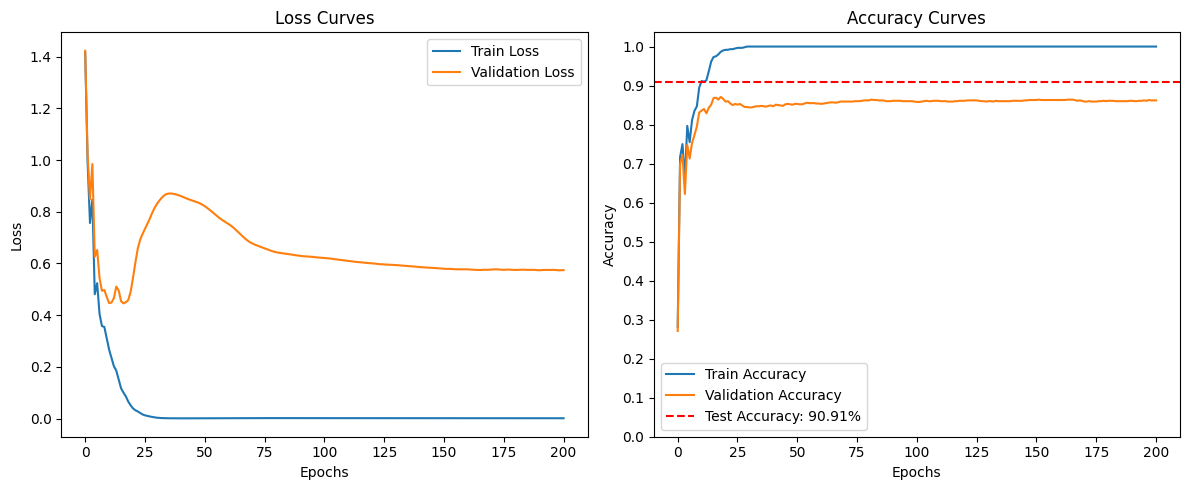

GAT test accuracy: 90.91%


In [37]:

# Train
gat.fit(data, epochs=200)

# Test
acc = gat.test(data)
print(f'GAT test accuracy: {acc*100:.2f}%')

In [37]:
data

Data(x=[22470, 128], edge_index=[2, 342004], y=[22470], num_classes=4, train_mask=[600], test_mask=[99], val_mask=[1000])

# GIN

In [32]:
import torch
torch.manual_seed(0)
import torch.nn.functional as F
from torch.nn import Linear, Sequential, BatchNorm1d, ReLU, Dropout
from torch_geometric.nn import GCNConv, GINConv

In [34]:
def accuracy(y_pred, y_true):
    return torch.sum(y_pred == y_true) / len(y_true)


class GIN(torch.nn.Module):
    """GIN"""
    def __init__(self, dim_in,dim_h,dim_out):
        super(GIN, self).__init__()
        self.conv1 = GINConv(
            Sequential(Linear(dim_in, dim_h),
                       BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
        
        self.conv2 = GINConv(
            Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
        self.conv3 = GINConv(
            Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
        self.lin = Linear(dim_h, dim_out)

    def forward(self, x, edge_index):
        # Node embeddings 
        h = self.conv1(x, edge_index)
        h = torch.relu(h)
        h = self.conv2(h, edge_index)
        h = torch.relu(h)
        h = self.conv3(h,edge_index)
        return F.log_softmax(h, dim=1)
    
    def fit(self,data,epochs):
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=0.01,weight_decay=5e-4)
        
        
        train_losses = []
        val_losses = []
        train_accuracies = []
        val_accuracies = []
        
        self.train()
        
        for epoch in range(epochs+1):
            optimizer.zero_grad()
            out = self(data.x, data.edge_index)
            loss = criterion(out[data.train_mask], data.y[data.train_mask].long())
            acc = accuracy(out[data.train_mask].argmax(dim=1), data.y[data.train_mask])
            loss.backward()
            optimizer.step()
            
             
            train_losses.append(loss.item())
            train_accuracies.append(acc)
            
            val_loss = criterion(out[data.val_mask], data.y[data.val_mask].long())
            val_acc = accuracy(out[data.val_mask].argmax(dim=1),
                                  data.y[data.val_mask])
            
            val_losses.append(val_loss.item())
            val_accuracies.append(val_acc)

            if(epoch % 20 == 0):
                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc: {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | Val Acc: {val_acc*100:.2f}%')
        
        test_acc = self.test(data)
        
        # After training, plot the loss and accuracy curves
        self.plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies,test_acc)
            
    
    @torch.no_grad()
    def test(self, data):
        self.eval()
        out = self(data.x, data.edge_index)
        acc = accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
        return acc 
    
    def plot_training_curves(self, train_losses, val_losses, train_accuracies, val_accuracies,test_acc):
        # Plot loss curves
        epochs = range(len(train_losses))
        plt.figure(figsize=(12, 5))

        # Loss plot
        plt.subplot(1, 2, 1)
        plt.plot(epochs, train_losses, label='Train Loss')
        plt.plot(epochs, val_losses, label='Validation Loss')
        plt.title('Loss Curves')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        # Accuracy plot
        plt.subplot(1, 2, 2)
        plt.plot(epochs, train_accuracies, label='Train Accuracy')
        plt.plot(epochs, val_accuracies, label='Validation Accuracy')
        
         # Plot test accuracy as a horizontal line
        plt.axhline(y=test_acc, color='r', linestyle='--', label=f'Test Accuracy: {test_acc*100:.2f}%')
        
        plt.title('Accuracy Curves')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        
        # Set y-axis ticks to increments of 0.1
        plt.yticks(np.arange(0, 1.1, 0.1))

        plt.tight_layout()
        plt.show()

In [29]:
gin = GIN(data.num_features,32,data.num_classes)
gin

GIN(
  (conv1): GINConv(nn=Sequential(
    (0): Linear(in_features=128, out_features=32, bias=True)
    (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=32, out_features=32, bias=True)
    (4): ReLU()
  ))
  (conv2): GINConv(nn=Sequential(
    (0): Linear(in_features=32, out_features=32, bias=True)
    (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=32, out_features=32, bias=True)
    (4): ReLU()
  ))
  (conv3): GINConv(nn=Sequential(
    (0): Linear(in_features=32, out_features=32, bias=True)
    (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=32, out_features=32, bias=True)
    (4): ReLU()
  ))
  (lin): Linear(in_features=32, out_features=4, bias=True)
)

Epoch   0 | Train Loss: 3.438 | Train Acc: 25.17% | Val Loss: 3.44 | Val Acc: 27.60%
Epoch  20 | Train Loss: 1.386 | Train Acc: 59.17% | Val Loss: 1.37 | Val Acc: 60.70%
Epoch  40 | Train Loss: 0.454 | Train Acc: 87.33% | Val Loss: 0.59 | Val Acc: 80.00%
Epoch  60 | Train Loss: 0.200 | Train Acc: 94.33% | Val Loss: 0.56 | Val Acc: 84.00%
Epoch  80 | Train Loss: 0.077 | Train Acc: 98.67% | Val Loss: 0.71 | Val Acc: 83.80%
Epoch 100 | Train Loss: 0.022 | Train Acc: 99.67% | Val Loss: 0.91 | Val Acc: 81.00%
Epoch 120 | Train Loss: 0.007 | Train Acc: 100.00% | Val Loss: 0.97 | Val Acc: 79.20%
Epoch 140 | Train Loss: 0.003 | Train Acc: 100.00% | Val Loss: 1.04 | Val Acc: 78.70%
Epoch 160 | Train Loss: 0.002 | Train Acc: 100.00% | Val Loss: 1.07 | Val Acc: 78.60%
Epoch 180 | Train Loss: 0.001 | Train Acc: 100.00% | Val Loss: 1.09 | Val Acc: 78.80%
Epoch 200 | Train Loss: 0.250 | Train Acc: 94.67% | Val Loss: 0.53 | Val Acc: 85.00%


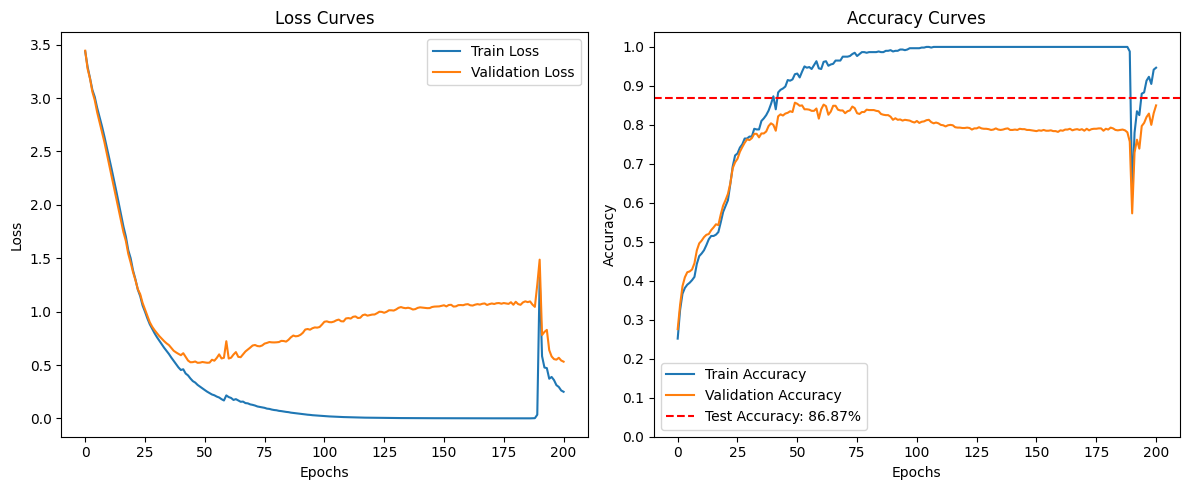

In [30]:
gin.fit(data,epochs = 200)

In [31]:
# Test
acc = gin.test(data)
print(f'GIN test accuracy: {acc*100:.2f}%')

GIN test accuracy: 86.87%
